In [1]:
# 
# Hands-on Lab: Pivot Charts¶
#
# 動手實驗室：資料透視圖
#


In [2]:
# Setup
# For this lab, we will be using the following libraries:
#
# pandas for managing the data.
# seaborn for visualizing the data.
# matplotlib for additional plotting tools.
# sqlite3 for accessing the database
# Installing Required Libraries
# Execute the following code to install the required libraries on the interface
# Setup
#

# Installing Required Libraries
# Execute the following code to install the required libraries on the interface
#
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the database and read the data table as a Pandas dataframe for further usage, by executing the following code.
#

conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
QUERY = """SELECT * FROM master"""
df = pd.read_sql(QUERY,conn)

In [5]:
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           11398 non-null  int64  
 1   Respondent      11398 non-null  int64  
 2   MainBranch      11398 non-null  object 
 3   Hobbyist        11398 non-null  object 
 4   OpenSourcer     11398 non-null  object 
 5   OpenSource      11317 non-null  object 
 6   Employment      11398 non-null  object 
 7   Country         11398 non-null  object 
 8   Student         11347 non-null  object 
 9   EdLevel         11286 non-null  object 
 10  UndergradMajor  10661 non-null  object 
 11  OrgSize         11302 non-null  object 
 12  YearsCode       11389 non-null  object 
 13  Age1stCode      11385 non-null  object 
 14  YearsCodePro    11382 non-null  object 
 15  CareerSat       11398 non-null  object 
 16  JobSat          11397 non-null  object 
 17  MgrIdiot        10905 non-null 

In [7]:
df.describe()

,index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,5698.500000,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.779318
std,3290.463519,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393680
min,0.000000,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,2849.250000,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,5698.500000,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,8547.750000,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,11397.000000,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [8]:
# Scenario 1: Distribution of Respondents by Career Satisfaction and Job Satisfaction
#
# 情境 1：受訪者職業滿意度與工作滿意度分佈
#
# In the first task, you can plot a distribution of the distribution of the respondents 
# in terms of their Career Satisfaction and Job satisfaction. For this, 
# we need to create a pivot with one of the axis representing unique values of CareerSat field, 
# another axis representing JobSat values, 
# and the data to be shown under each map to be set as the count of respondents. 
# To achieve this, you can execute the code block shared below.
#
# 在第一個任務中，您可以根據受訪者的職業滿意度和工作滿意度繪製分佈圖。
# 為此，我們需要建立一個資料透視表，其中一個軸代表 CareerSat 欄位的唯一值，另一個軸代表 JobSat 值，
# 並且每個地圖下顯示的資料將設定為受訪者計數。為此，您可以執行下面共享的程式碼區塊。
#

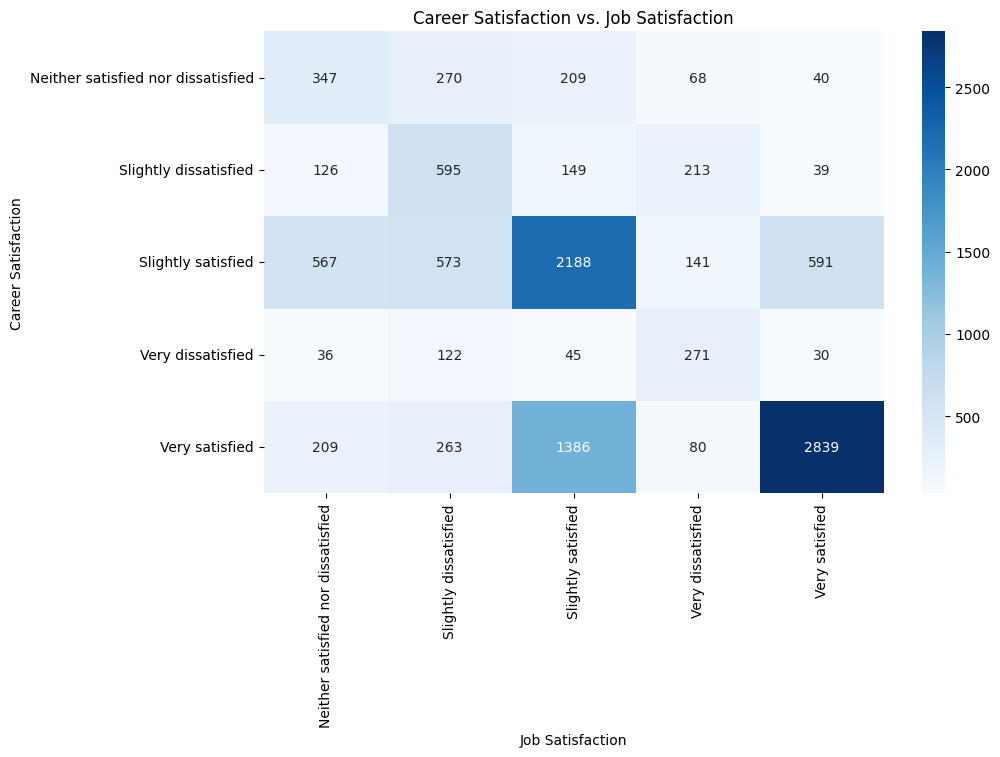

In [9]:
pivot_table = pd.pivot_table(df, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

In [10]:
# Scenario 2: Comparison of Open Source Adoption Across Operating Systems	
# 情境 2：跨作業系統開源採用情況的比較	
#	
# In this scenario, you can visualize the adoption of Open Sourse systems across 
# different operating systems by the respondents. 	
# To create this pivot chart, the index parameter, representing the x-axis, 
# can be set as OpSy sand the columns parameter can be set as OpenSource. 	
# The values parameter will be set as Respondent with aggregation function as count. 
# This graph should be plotted as a grouped bar graph.	
	
# 在這種情況下，您可以直觀地看到受訪者在不同作業系統中採用開源系統的情況。	
# 若要建立此資料透視圖，代表 x 軸的索引參數可以設定為 OpSys，列參數可以設定為 OpenSource。	
# 值參數將設定為響應者，聚合函數為計數。此圖應繪製為分組長條圖。	
	
# As a practice exercise, try to complete the code block below to generate the pivot chart yourself. 	
# Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.	


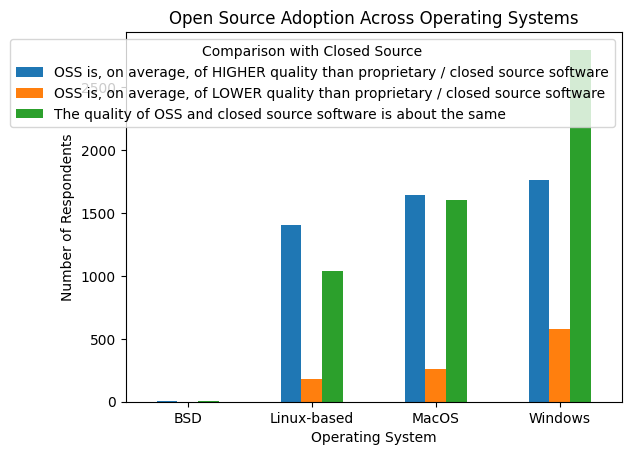

In [11]:
# pivot_table = 
#
# Plotting
# pivot_table.plot(kind=' ')
#

pivot_table = pd.pivot_table(df, index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()

In [12]:
# Scenario 2: Comparison of Open Source Adoption Across Operating Systems	
# 情境 2：跨作業系統開源採用情況的比較	
#	
# In this scenario, you can visualize the adoption of Open Sourse systems across 
# different operating systems by the respondents. 	
# To create this pivot chart, the index parameter, representing the x-axis, 
# can be set as OpSy sand the columns parameter can be set as OpenSource. 	
# The values parameter will be set as Respondent with aggregation function as count. 
# This graph should be plotted as a grouped bar graph.	
	
# 在這種情況下，您可以直觀地看到受訪者在不同作業系統中採用開源系統的情況。	
# 若要建立此資料透視圖，代表 x 軸的索引參數可以設定為 OpSys，列參數可以設定為 OpenSource。	
# 值參數將設定為響應者，聚合函數為計數。此圖應繪製為分組長條圖。	
	
# As a practice exercise, try to complete the code block below to generate the pivot chart yourself. 	
# Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.	
#

# case 2


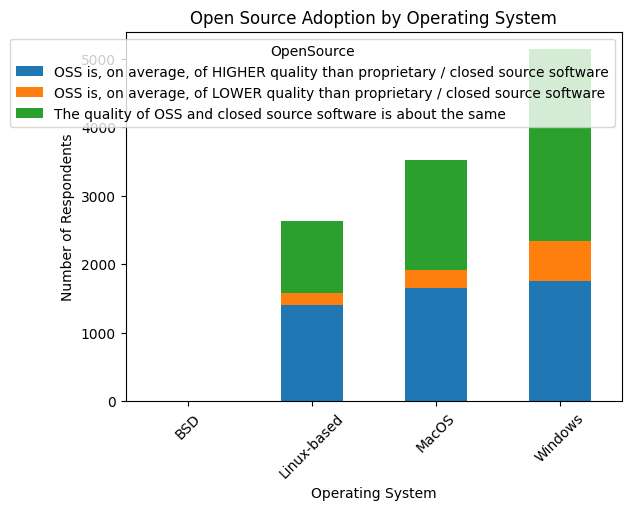

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'OpSys' and 'OpenSource' columns

# Create a pivot table
pivot_table = df.pivot_table(index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count')

# Create a grouped bar chart
pivot_table.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Open Source Adoption by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)

plt.show()

In [14]:
# Scenario 3: Job Satisfaction and Career Aspirations by Employment Status											
# In this scenario, you can explore a deeper interpretation of the data using Pivot charts. 											
# Let us explore how employment status and job satisfaction affects the career aspirations of the respondents.											
#
# For this, you need to create a pivot table with 'Employment' and 'JobSat' fields as index, 											
# MgrWant' field as columns and 'Respondent' as values with aggregation function as 'count'. 											
# Complete the following code block to generate the said pivot chart.											
#											
# Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.											
#
# 在這種情況下，您可以使用資料透視圖來探索對資料的更深入解釋。讓我們探討一下就業狀況和工作滿意度如何影響受訪者的職業抱負。
#
# 為此，您需要建立一個資料透視表，其中「Employment」和「JobSat」欄位作為索引，「MgrWant」欄位作為列，
# 「Respondent」作為值，聚合函數為「count」。完成以下程式碼區塊以產生所述資料透視圖。
#
# 建立資料透視圖後，您可以根據可見分佈進行推論。
#


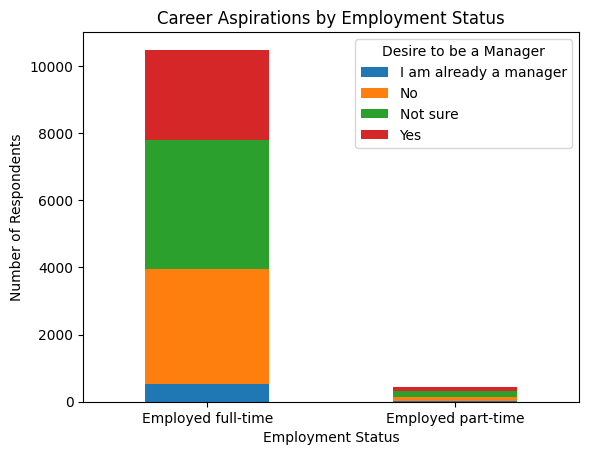

In [15]:
pivot_table = pd.pivot_table(df, index='Employment', columns='MgrWant', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True)
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0)
plt.show()

In [16]:
# Scenario 3: Job Satisfaction and Career Aspirations by Employment Status											
# In this scenario, you can explore a deeper interpretation of the data using Pivot charts. 											
# Let us explore how employment status and job satisfaction affects the career aspirations of the respondents.											
#
# For this, you need to create a pivot table with 'Employment' and 'JobSat' fields as index, 											
# MgrWant' field as columns and 'Respondent' as values with aggregation function as 'count'. 											
# Complete the following code block to generate the said pivot chart.											
#											
# Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.											
#
# 在這種情況下，您可以使用資料透視圖來探索對資料的更深入解釋。讓我們探討一下就業狀況和工作滿意度如何影響受訪者的職業抱負。
#
# 為此，您需要建立一個資料透視表，其中「Employment」和「JobSat」欄位作為索引，「MgrWant」欄位作為列，
# 「Respondent」作為值，聚合函數為「count」。完成以下程式碼區塊以產生所述資料透視圖。
#
# 建立資料透視圖後，您可以根據可見分佈進行推論。
#
# case 2
#

ValueError: Unknown format code 'd' for object of type 'float'

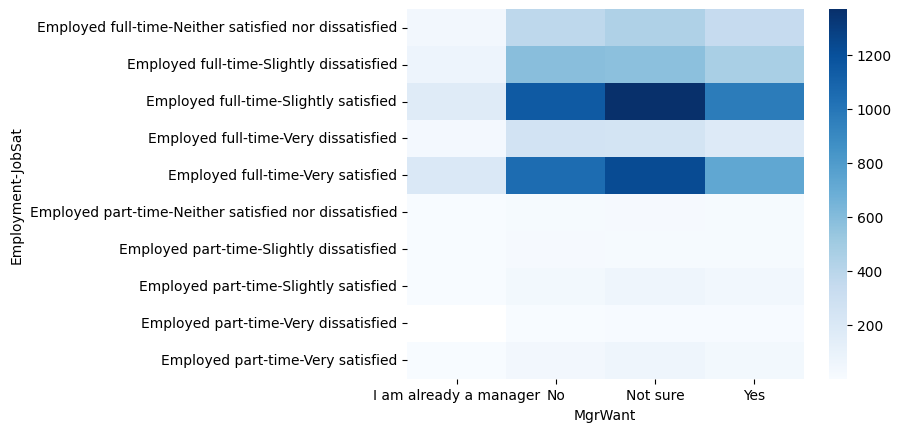

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the relevant columns

# Create a pivot table
pivot_table = df.pivot_table(index=['Employment', 'JobSat'], columns='MgrWant', values='Respondent', aggfunc='count')

# Create a heatmap
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')

# Customize the plot
plt.title('Job Satisfaction and Career Aspirations by Employment Status')
plt.xlabel('Desire for Management Position')
plt.ylabel('Employment Status and Job Satisfaction')

plt.show()